# Evaluation of UNET performance upon common distortions

The aim of this notebook is to provide some informations about how a UNET initially trained to segment cells is perturbated by some common distortions applied on the input images. The tested distortions applied on the inputs are an added 2D gaussian, a gaussian noise as well as a rescaling of the input images. To evaluate the performance of the UNET, several plots are generated: the accuracy, the Jaccard index and the number of detected cells in function of the degree of degradation that depends on the parameters of the distortions.

### $\bullet$ Importing libraries and utilitary functions

In [1]:
# Import python libraries.
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
%load_ext autoreload
%autoreload 2
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '1'
import tensorflow

# Import distortion filters and utilitary functions.
from distortions import add_gaussian, zoom_image, zoom_image_to_meet_shape, add_gaussian_noise
from utils import *
from plots import show_image_mask, show_image_pred, plot_results

In [2]:
# Set seeds of random number generators to guarantee reproducibility.
np.random.seed(3)
tensorflow.random.set_seed(4)

### $\bullet$ Setting size of the input image and different paths

In [3]:
# Shape of the inputs of the deep network.
images_shape = (256, 256, 1)

# Variables defining the path to the dataset.
test_input_path = '../Dataset/test/input/'
test_output_path = '../Dataset/test/output/'

# Variable defining where model is stored.
model_save_path = "../Model Original/"

### $\bullet$ Function to display the input images and predictions upon distorsion as well as a summary of values that shows the quality of the predicted images compared to the ground truth

In [4]:
def evaluation_summary(result, parameter_name, parameter_val, image, mask, distorted_image, model):
    """Eval.
    
    Args:
        images::[np.array]
            The output measures associated to the input measures tX.
        masks::[np.array]
            The input measures.
    
    """
    print("{:<45}: {}".format(parameter_name.upper()          , parameter_val))
    print("{:<45}: {}".format("Accuracy"                      , result["accuracy"]))
    print("{:<45}: {}".format("Jaccard score"                 , result["jaccard"]))
    print("{:<45}: {}".format("Precision"                     , result["precision"]))
    print("{:<45}: {}".format("Recall"                        , result["recall"]))
    print("{:<45}: {}".format("Number of cells in predictions", result["number_cells_predictions"]))
    print("{:<45}: {}".format("Number of cells in masks"      , result["number_cells_masks"]))
    show_image_mask(image, mask)
    show_image_pred(distorted_image, model)
    
    
def evaluate_model(images, masks, model, number_cells_masks=None):
    """Eval.
    
    Args:
        images::[np.array]
            The output measures associated to the input measures tX.
        masks::[np.array]
            The input measures.
    Returns:
        accuracy::[float]
            An array comprised of n_folds equally distributed arrays of y.
        jaccard_score::[float]
            An array comprised of n_folds equally distributed arrays of tX.
        number_cells_predictions::[int]
        number_cells_masks::[int]
    
    """
    predictions = get_binary_predictions(images, model)
    accuracy    = np.mean(predictions == masks)
    jaccard     = compute_jaccard_score(predictions, masks)
    precision, recall = compute_precision_recall(predictions, masks)

    number_cells_predictions = get_number_cells(predictions)
    if number_cells_masks is None:
        number_cells_masks = get_number_cells(masks)
    
    return {"accuracy": accuracy, "jaccard": jaccard, "precision": precision, 
            "recall": recall, "number_cells_predictions": number_cells_predictions,
            "number_cells_masks": number_cells_masks}


def apply_distortion_to_all(function, images, params_for_images={}):
    distorted_images = []
    for image in images:
        distorted_images.append(function(image, **params_for_images))
    
    return np.array(distorted_images)

### $\bullet$ Retrieve trained model

In [5]:
model = tensorflow.keras.models.load_model(model_save_path)

### $\bullet$ Load images from the dataset

In [6]:
test_images, test_masks = get_dataset_from_folders(test_input_path, test_output_path, images_shape)

print(f'Test set contains {len(test_images)} images of shape {test_images[0].shape}.')

number_cells_masks = get_number_cells(test_masks)
print(f"{number_cells_masks} cells were counted in total over all masks.")

Test set contains 510 images of shape (256, 256, 1).
16106 cells were counted in total over all masks.


### $\bullet$ Analysis of the perturbations caused by an added gaussian on the UNET performance

AMPLITUDE OF GAUSSIAN (BEFORE NORMALIZATION) : 0.0
Accuracy                                     : 0.9762900258980546
Jaccard score                                : 0.6669174883252108
Precision                                    : 0.8921809939209842
Recall                                       : 0.7301211924585125
Number of cells in predictions               : 16869
Number of cells in masks                     : 16106


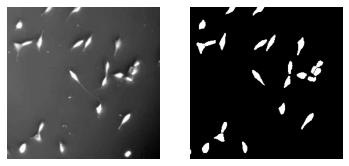

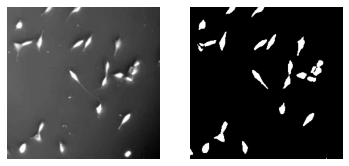

AMPLITUDE OF GAUSSIAN (BEFORE NORMALIZATION) : 100.0
Accuracy                                     : 0.9789202222637102
Jaccard score                                : 0.6967894986217433
Precision                                    : 0.9205647483650811
Recall                                       : 0.7437121723885517
Number of cells in predictions               : 16247
Number of cells in masks                     : 16106


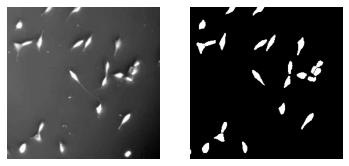

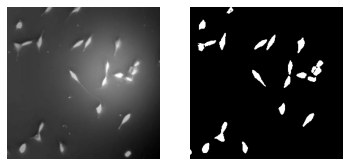

AMPLITUDE OF GAUSSIAN (BEFORE NORMALIZATION) : 200.0
Accuracy                                     : 0.9809529622395833
Jaccard score                                : 0.7270049681406078
Precision                                    : 0.9332944606533657
Recall                                       : 0.7680429562999879
Number of cells in predictions               : 16435
Number of cells in masks                     : 16106


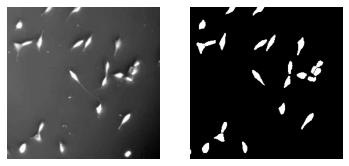

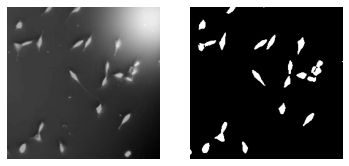

AMPLITUDE OF GAUSSIAN (BEFORE NORMALIZATION) : 300.0
Accuracy                                     : 0.9802169799804688
Jaccard score                                : 0.7197791144896855
Precision                                    : 0.938006290776582
Recall                                       : 0.7569011206328606
Number of cells in predictions               : 16451
Number of cells in masks                     : 16106


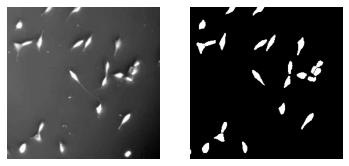

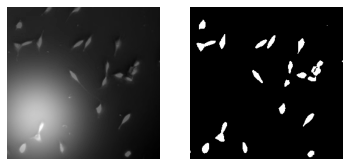

AMPLITUDE OF GAUSSIAN (BEFORE NORMALIZATION) : 400.0
Accuracy                                     : 0.9774957993451286
Jaccard score                                : 0.6832570666285815
Precision                                    : 0.9382794678106268
Recall                                       : 0.7168708800378585
Number of cells in predictions               : 16247
Number of cells in masks                     : 16106


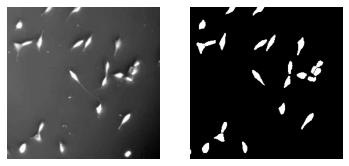

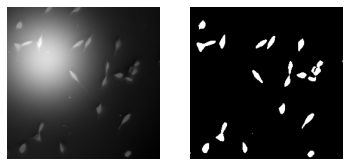

AMPLITUDE OF GAUSSIAN (BEFORE NORMALIZATION) : 500.0
Accuracy                                     : 0.97327506869447
Jaccard score                                : 0.6258702377748819
Precision                                    : 0.9358277042672921
Recall                                       : 0.6553222645437056
Number of cells in predictions               : 15880
Number of cells in masks                     : 16106


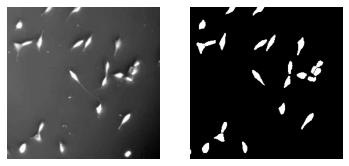

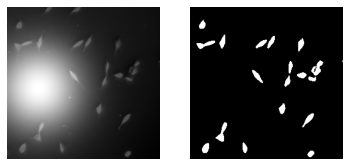

AMPLITUDE OF GAUSSIAN (BEFORE NORMALIZATION) : 600.0
Accuracy                                     : 0.9695431279201133
Jaccard score                                : 0.5735495581182609
Precision                                    : 0.9362942604545365
Recall                                       : 0.5982276840489944
Number of cells in predictions               : 15616
Number of cells in masks                     : 16106


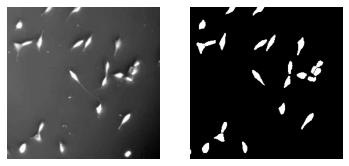

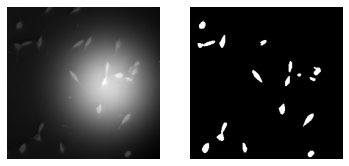

AMPLITUDE OF GAUSSIAN (BEFORE NORMALIZATION) : 700.0
Accuracy                                     : 0.9653084549249388
Jaccard score                                : 0.5111128326982326
Precision                                    : 0.9356437754960405
Recall                                       : 0.5309296627927073
Number of cells in predictions               : 15099
Number of cells in masks                     : 16106


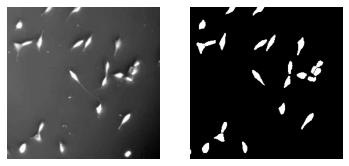

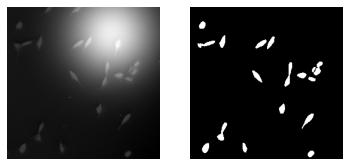

AMPLITUDE OF GAUSSIAN (BEFORE NORMALIZATION) : 800.0
Accuracy                                     : 0.9610297408758425
Jaccard score                                : 0.4468042375322752
Precision                                    : 0.9365416183904145
Recall                                       : 0.4617650109983758
Number of cells in predictions               : 14472
Number of cells in masks                     : 16106


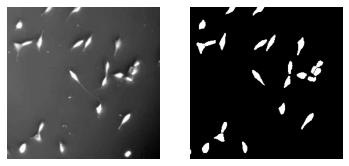

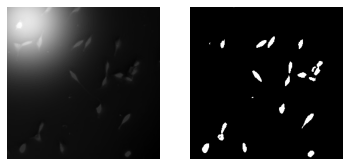

AMPLITUDE OF GAUSSIAN (BEFORE NORMALIZATION) : 900.0
Accuracy                                     : 0.9570566214767157
Jaccard score                                : 0.3866051172181002
Precision                                    : 0.9363071436331715
Recall                                       : 0.3981220422741189
Number of cells in predictions               : 13899
Number of cells in masks                     : 16106


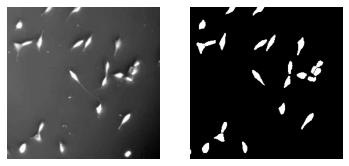

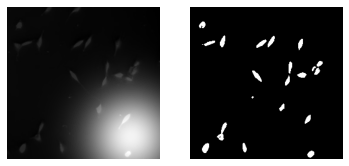

AMPLITUDE OF GAUSSIAN (BEFORE NORMALIZATION) : 1000.0
Accuracy                                     : 0.9533410165824142
Jaccard score                                : 0.3277455334606063
Precision                                    : 0.9355390810934567
Recall                                       : 0.3359243939460324
Number of cells in predictions               : 13159
Number of cells in masks                     : 16106


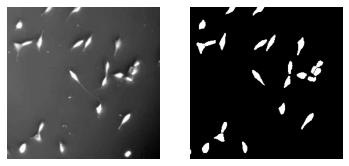

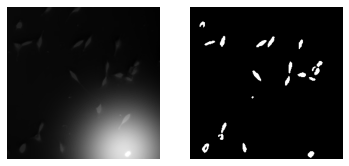

AMPLITUDE OF GAUSSIAN (BEFORE NORMALIZATION) : 1100.0
Accuracy                                     : 0.9498326021082261
Jaccard score                                : 0.2713894932077762
Precision                                    : 0.9384311149127255
Recall                                       : 0.27693207683465776
Number of cells in predictions               : 12278
Number of cells in masks                     : 16106


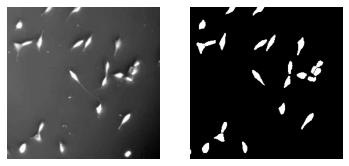

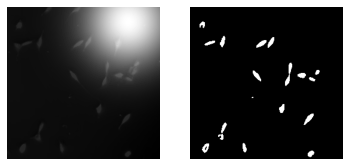

AMPLITUDE OF GAUSSIAN (BEFORE NORMALIZATION) : 1200.0
Accuracy                                     : 0.947394666484758
Jaccard score                                : 0.23427722481006463
Precision                                    : 0.9419914480021734
Recall                                       : 0.23824429600923075
Number of cells in predictions               : 11769
Number of cells in masks                     : 16106


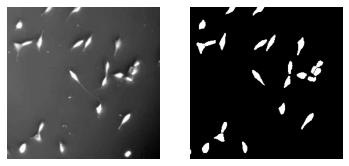

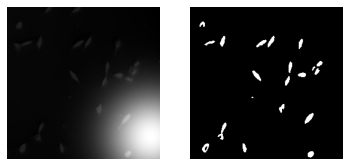

AMPLITUDE OF GAUSSIAN (BEFORE NORMALIZATION) : 1300.0
Accuracy                                     : 0.9449986476524204
Jaccard score                                : 0.19556923645903718
Precision                                    : 0.9416275679911406
Recall                                       : 0.1983063244342182
Number of cells in predictions               : 11245
Number of cells in masks                     : 16106


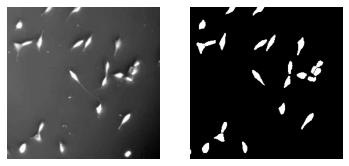

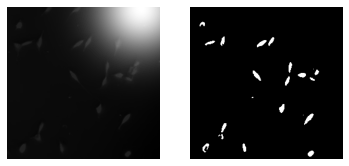

AMPLITUDE OF GAUSSIAN (BEFORE NORMALIZATION) : 1400.0
Accuracy                                     : 0.9429599537568933
Jaccard score                                : 0.16248297164512213
Precision                                    : 0.9398080376942243
Recall                                       : 0.16433980911257684
Number of cells in predictions               : 10723
Number of cells in masks                     : 16106


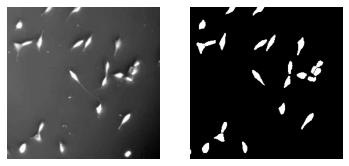

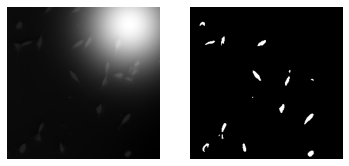

AMPLITUDE OF GAUSSIAN (BEFORE NORMALIZATION) : 1500.0
Accuracy                                     : 0.9415681128408394
Jaccard score                                : 0.1397114728016435
Precision                                    : 0.9438510726225753
Recall                                       : 0.14102325818764472
Number of cells in predictions               : 10377
Number of cells in masks                     : 16106


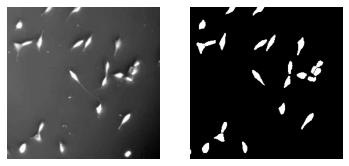

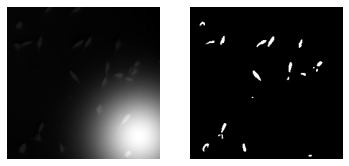

AMPLITUDE OF GAUSSIAN (BEFORE NORMALIZATION) : 1600.0
Accuracy                                     : 0.9399237838445925
Jaccard score                                : 0.11289995599243233
Precision                                    : 0.9429881647059483
Recall                                       : 0.11380526015266972
Number of cells in predictions               : 9563
Number of cells in masks                     : 16106


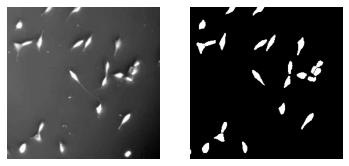

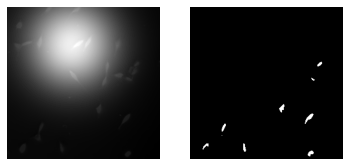

AMPLITUDE OF GAUSSIAN (BEFORE NORMALIZATION) : 1700.0
Accuracy                                     : 0.9388498942057292
Jaccard score                                : 0.09555137534799299
Precision                                    : 0.9432096552894187
Recall                                       : 0.09615741340817589
Number of cells in predictions               : 8988
Number of cells in masks                     : 16106


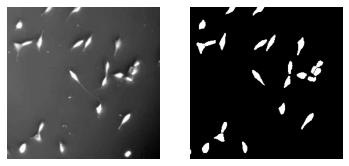

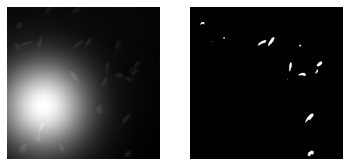

AMPLITUDE OF GAUSSIAN (BEFORE NORMALIZATION) : 1800.0
Accuracy                                     : 0.9377593694948683
Jaccard score                                : 0.07763736889119878
Precision                                    : 0.9462627230389167
Recall                                       : 0.07806511578967053
Number of cells in predictions               : 8169
Number of cells in masks                     : 16106


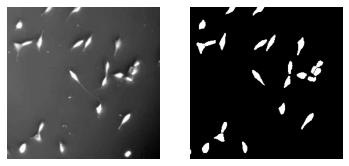

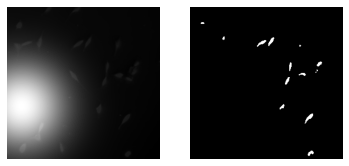

AMPLITUDE OF GAUSSIAN (BEFORE NORMALIZATION) : 1900.0
Accuracy                                     : 0.9369937373142616
Jaccard score                                : 0.06466102654124034
Precision                                    : 0.9410621779699967
Recall                                       : 0.06494400920389669
Number of cells in predictions               : 7730
Number of cells in masks                     : 16106


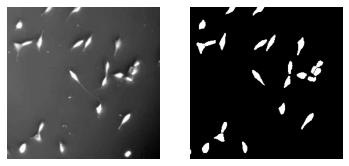

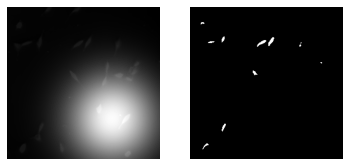

AMPLITUDE OF GAUSSIAN (BEFORE NORMALIZATION) : 2000.0
Accuracy                                     : 0.9361924115349265
Jaccard score                                : 0.051602043098921045
Precision                                    : 0.9458467168027674
Recall                                       : 0.051799023604313515
Number of cells in predictions               : 6972
Number of cells in masks                     : 16106


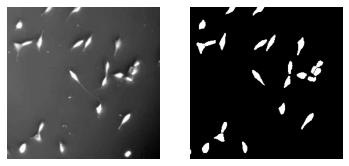

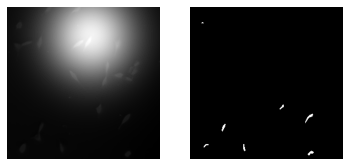

AMPLITUDE OF GAUSSIAN (BEFORE NORMALIZATION) : 2100.0
Accuracy                                     : 0.9354344087488511
Jaccard score                                : 0.03936581882558233
Precision                                    : 0.9383861262299086
Recall                                       : 0.03948681329276254
Number of cells in predictions               : 6220
Number of cells in masks                     : 16106


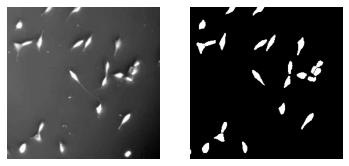

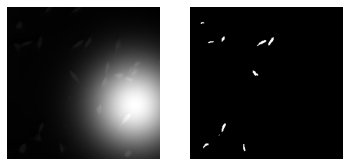

AMPLITUDE OF GAUSSIAN (BEFORE NORMALIZATION) : 2200.0
Accuracy                                     : 0.9348716586243873
Jaccard score                                : 0.030398743581667297
Precision                                    : 0.9315688814246822
Recall                                       : 0.03047553664850827
Number of cells in predictions               : 5414
Number of cells in masks                     : 16106


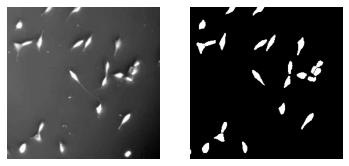

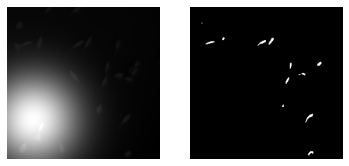

AMPLITUDE OF GAUSSIAN (BEFORE NORMALIZATION) : 2300.0
Accuracy                                     : 0.9344066844267004
Jaccard score                                : 0.022732827415103168
Precision                                    : 0.9260265924691363
Recall                                       : 0.022774367526127767
Number of cells in predictions               : 4769
Number of cells in masks                     : 16106


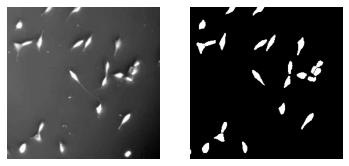

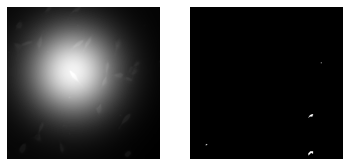

AMPLITUDE OF GAUSSIAN (BEFORE NORMALIZATION) : 2400.0
Accuracy                                     : 0.9340560314702052
Jaccard score                                : 0.01730461211512955
Precision                                    : 0.9044091774033642
Recall                                       : 0.017332020176146656
Number of cells in predictions               : 4106
Number of cells in masks                     : 16106


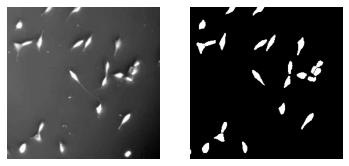

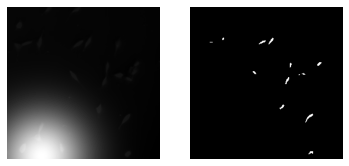

AMPLITUDE OF GAUSSIAN (BEFORE NORMALIZATION) : 2500.0
Accuracy                                     : 0.9338297226849724
Jaccard score                                : 0.013370405239057267
Precision                                    : 0.8950734812977766
Recall                                       : 0.013390526024981607
Number of cells in predictions               : 3685
Number of cells in masks                     : 16106


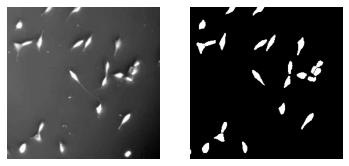

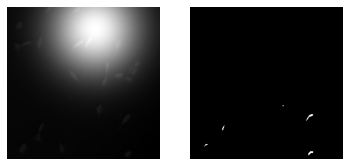

AMPLITUDE OF GAUSSIAN (BEFORE NORMALIZATION) : 2600.0
Accuracy                                     : 0.933577683392693
Jaccard score                                : 0.00938212424525705
Precision                                    : 0.8858770281248362
Recall                                       : 0.009392937557382842
Number of cells in predictions               : 3030
Number of cells in masks                     : 16106


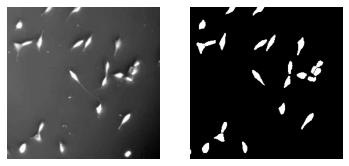

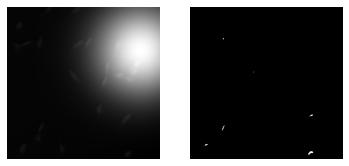

AMPLITUDE OF GAUSSIAN (BEFORE NORMALIZATION) : 2700.0
Accuracy                                     : 0.9334832284964767
Jaccard score                                : 0.007630574992438194
Precision                                    : 0.8462204628408788
Recall                                       : 0.007635869222636344
Number of cells in predictions               : 2669
Number of cells in masks                     : 16106


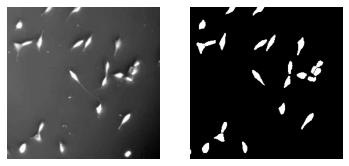

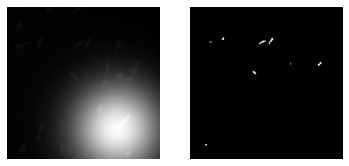

AMPLITUDE OF GAUSSIAN (BEFORE NORMALIZATION) : 2800.0
Accuracy                                     : 0.9333283667470894
Jaccard score                                : 0.005379916125309469
Precision                                    : 0.8224786997984485
Recall                                       : 0.005384580402173846
Number of cells in predictions               : 2303
Number of cells in masks                     : 16106


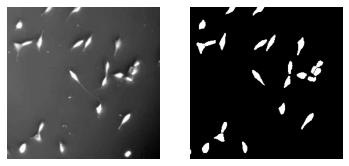

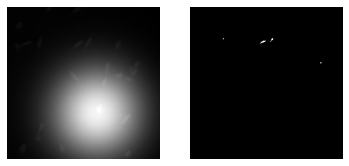

AMPLITUDE OF GAUSSIAN (BEFORE NORMALIZATION) : 2900.0
Accuracy                                     : 0.9332485423368566
Jaccard score                                : 0.003827809792135506
Precision                                    : 0.7614810554780045
Recall                                       : 0.0038295225219119756
Number of cells in predictions               : 1837
Number of cells in masks                     : 16106


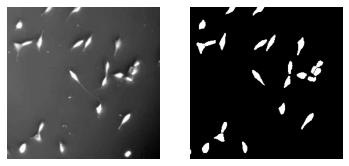

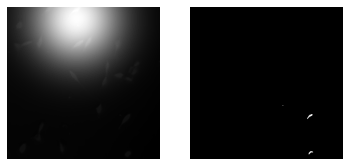

AMPLITUDE OF GAUSSIAN (BEFORE NORMALIZATION) : 3000.0
Accuracy                                     : 0.9331663243910846
Jaccard score                                : 0.0024911472670020207
Precision                                    : 0.69432084080997
Recall                                       : 0.00249217949975141
Number of cells in predictions               : 1544
Number of cells in masks                     : 16106


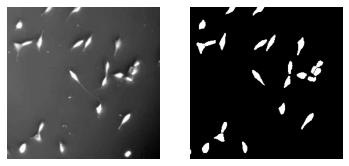

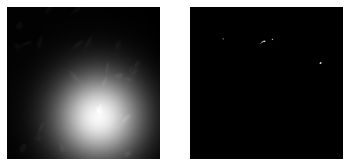

AMPLITUDE OF GAUSSIAN (BEFORE NORMALIZATION) : 3100.0
Accuracy                                     : 0.9331425087124694
Jaccard score                                : 0.002099326084521645
Precision                                    : 0.6265073299197274
Recall                                       : 0.0021003257533131594
Number of cells in predictions               : 1337
Number of cells in masks                     : 16106


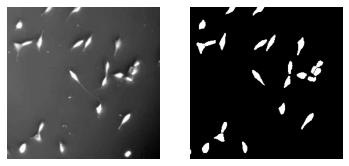

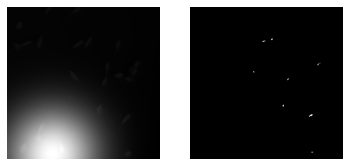

AMPLITUDE OF GAUSSIAN (BEFORE NORMALIZATION) : 3200.0
Accuracy                                     : 0.933097240971584
Jaccard score                                : 0.0013406088193033219
Precision                                    : 0.5248042590073775
Recall                                       : 0.0013411377587436166
Number of cells in predictions               : 1117
Number of cells in masks                     : 16106


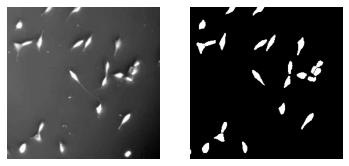

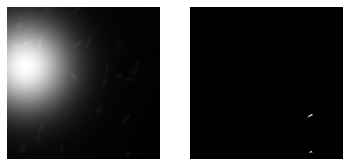

AMPLITUDE OF GAUSSIAN (BEFORE NORMALIZATION) : 3300.0
Accuracy                                     : 0.9330786312327666
Jaccard score                                : 0.001008119307663354
Precision                                    : 0.4385426466200161
Recall                                       : 0.0010082661849078352
Number of cells in predictions               : 962
Number of cells in masks                     : 16106


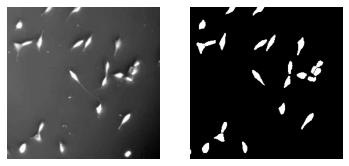

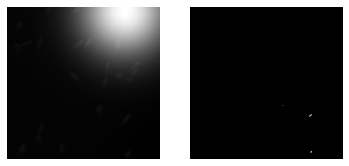

AMPLITUDE OF GAUSSIAN (BEFORE NORMALIZATION) : 3400.0
Accuracy                                     : 0.9330426085229013
Jaccard score                                : 0.0006723643939804267
Precision                                    : 0.3437044066892455
Recall                                       : 0.0006724853472400303
Number of cells in predictions               : 861
Number of cells in masks                     : 16106


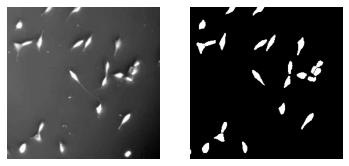

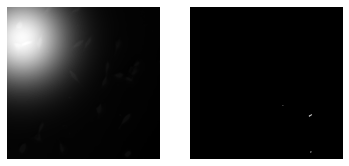

AMPLITUDE OF GAUSSIAN (BEFORE NORMALIZATION) : 3500.0
Accuracy                                     : 0.9330530503216912
Jaccard score                                : 0.0005733086995500559
Precision                                    : 0.32967423442807076
Recall                                       : 0.0005733880969466889
Number of cells in predictions               : 816
Number of cells in masks                     : 16106


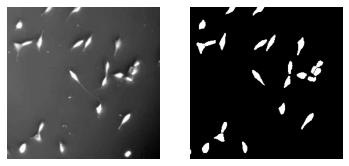

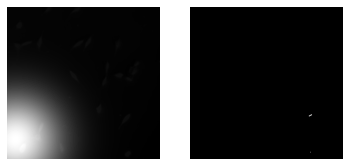

AMPLITUDE OF GAUSSIAN (BEFORE NORMALIZATION) : 3600.0
Accuracy                                     : 0.9330380009669884
Jaccard score                                : 0.00036818551149226547
Precision                                    : 0.25226961589233393
Recall                                       : 0.00036825976163347467
Number of cells in predictions               : 738
Number of cells in masks                     : 16106


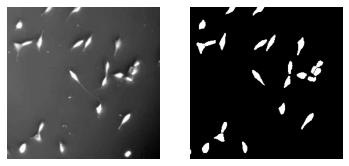

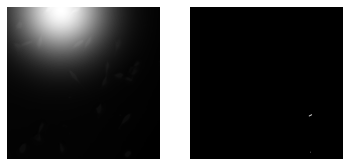

AMPLITUDE OF GAUSSIAN (BEFORE NORMALIZATION) : 3700.0
Accuracy                                     : 0.9330272599762561
Jaccard score                                : 0.00023845454328049687
Precision                                    : 0.20417055711173357
Recall                                       : 0.0002388731977149645
Number of cells in predictions               : 692
Number of cells in masks                     : 16106


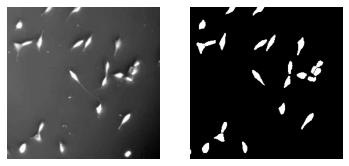

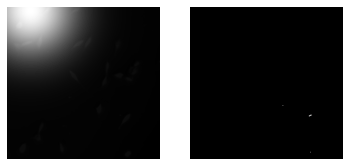

AMPLITUDE OF GAUSSIAN (BEFORE NORMALIZATION) : 3800.0
Accuracy                                     : 0.933031478582644
Jaccard score                                : 0.00020806585403061907
Precision                                    : 0.15800159807512745
Recall                                       : 0.00020807324588373806
Number of cells in predictions               : 645
Number of cells in masks                     : 16106


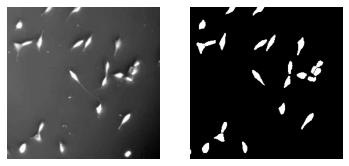

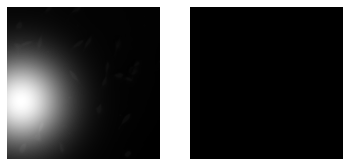

AMPLITUDE OF GAUSSIAN (BEFORE NORMALIZATION) : 3900.0
Accuracy                                     : 0.9330218446020987
Jaccard score                                : 0.00016475834684678362
Precision                                    : 0.12733495358927885
Recall                                       : 0.00016477707732985905
Number of cells in predictions               : 630
Number of cells in masks                     : 16106


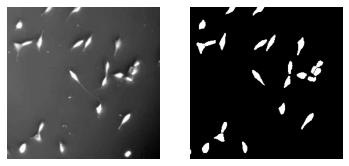

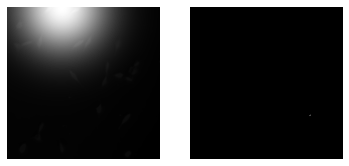

AMPLITUDE OF GAUSSIAN (BEFORE NORMALIZATION) : 4000.0
Accuracy                                     : 0.9330263923196231
Jaccard score                                : 0.00010671376046275369
Precision                                    : 0.0859041394335512
Recall                                       : 0.00010671567584566614
Number of cells in predictions               : 591
Number of cells in masks                     : 16106


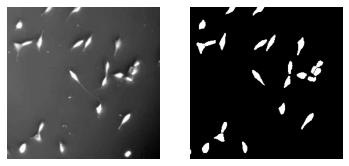

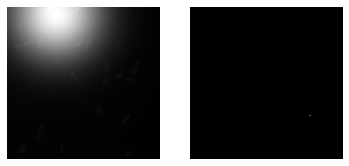

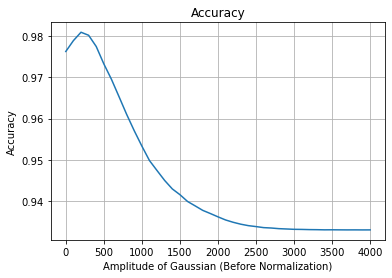

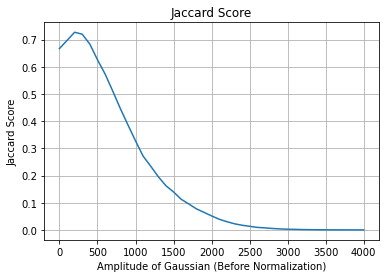

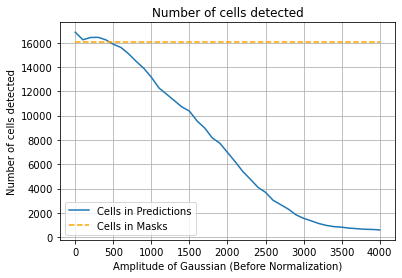

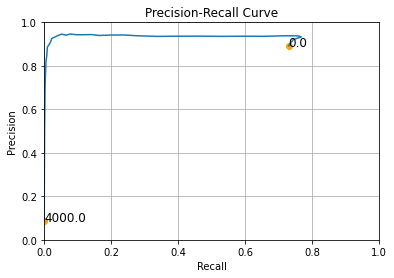

In [7]:
parameter_name = "Amplitude of Gaussian (Before Normalization)"
amplitudes = np.linspace(0, 4000, 41)
results = {}

for amplitude in amplitudes:
    added_gaussian_test_images = apply_distortion_to_all(add_gaussian, test_images, {"amplitude": amplitude})
    
    result = evaluate_model(added_gaussian_test_images, test_masks, model, number_cells_masks)
    results[amplitude] = result
    
    evaluation_summary(result, parameter_name, amplitude, test_images[0], test_masks[0], 
                       added_gaussian_test_images[0], model)
    
plot_results(results, parameter_name)

### $\bullet$ Analysis of the perturbations caused by a gaussian noise on the UNET performance

STANDARD DEVIATION                           : 0.0
Accuracy                                     : 0.9762900258980546
Jaccard score                                : 0.6669174883252108
Precision                                    : 0.8921809939209842
Recall                                       : 0.7301211924585125
Number of cells in predictions               : 16869
Number of cells in masks                     : 16106


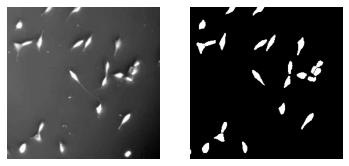

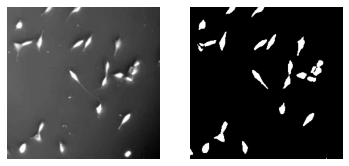

STANDARD DEVIATION                           : 5.0
Accuracy                                     : 0.9847480325137867
Jaccard score                                : 0.7944239728819534
Precision                                    : 0.9099193183487393
Recall                                       : 0.8625335901565521
Number of cells in predictions               : 18192
Number of cells in masks                     : 16106


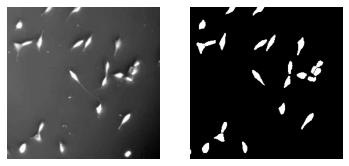

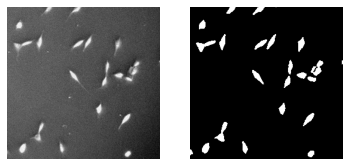

STANDARD DEVIATION                           : 10.0
Accuracy                                     : 0.9837490006989124
Jaccard score                                : 0.7830009899022281
Precision                                    : 0.8951389594023801
Recall                                       : 0.8621720884828411
Number of cells in predictions               : 21597
Number of cells in masks                     : 16106


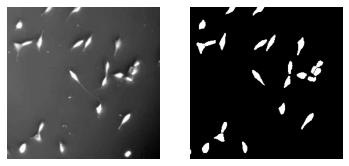

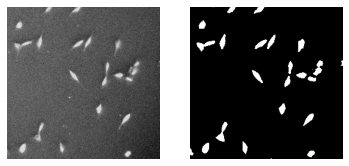

STANDARD DEVIATION                           : 15.0
Accuracy                                     : 0.9808979408413756
Jaccard score                                : 0.7495059021247183
Precision                                    : 0.8656665689449324
Recall                                       : 0.8484597228374928
Number of cells in predictions               : 28141
Number of cells in masks                     : 16106


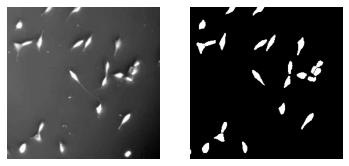

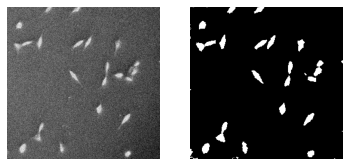

STANDARD DEVIATION                           : 20.0
Accuracy                                     : 0.9766604853611366
Jaccard score                                : 0.7042858568309297
Precision                                    : 0.8217752974552829
Recall                                       : 0.8324990772501843
Number of cells in predictions               : 37059
Number of cells in masks                     : 16106


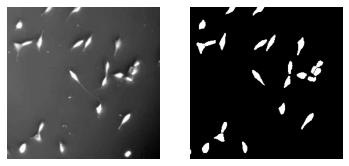

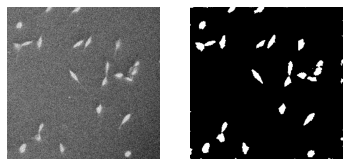

STANDARD DEVIATION                           : 25.0
Accuracy                                     : 0.97135482488894
Jaccard score                                : 0.6517123253647986
Precision                                    : 0.7698202257230653
Recall                                       : 0.8123446552193578
Number of cells in predictions               : 45632
Number of cells in masks                     : 16106


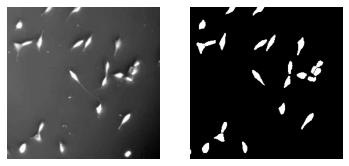

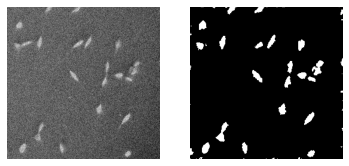

STANDARD DEVIATION                           : 30.0
Accuracy                                     : 0.9657322603113511
Jaccard score                                : 0.6017618689729045
Precision                                    : 0.7207507675566098
Recall                                       : 0.7898856897206995
Number of cells in predictions               : 52757
Number of cells in masks                     : 16106


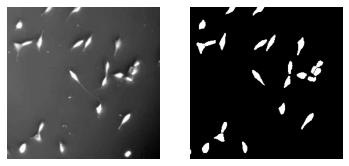

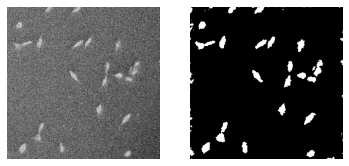

STANDARD DEVIATION                           : 35.0
Accuracy                                     : 0.9598507451076134
Jaccard score                                : 0.5538585219479466
Precision                                    : 0.6724229423498604
Recall                                       : 0.7657639898049672
Number of cells in predictions               : 59204
Number of cells in masks                     : 16106


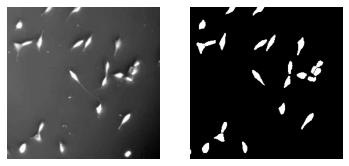

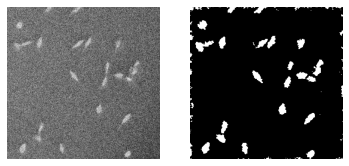

STANDARD DEVIATION                           : 40.0
Accuracy                                     : 0.9545776965571385
Jaccard score                                : 0.5129336330493222
Precision                                    : 0.6352321796282201
Recall                                       : 0.7373125486914716
Number of cells in predictions               : 64746
Number of cells in masks                     : 16106


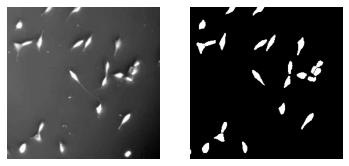

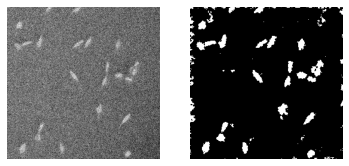

STANDARD DEVIATION                           : 45.0
Accuracy                                     : 0.949847412109375
Jaccard score                                : 0.4774966819425896
Precision                                    : 0.6033863651409389
Recall                                       : 0.7077272731506845
Number of cells in predictions               : 70520
Number of cells in masks                     : 16106


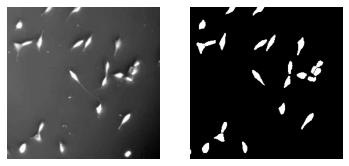

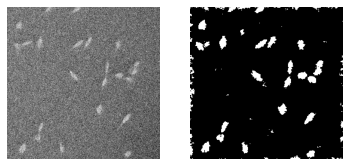

STANDARD DEVIATION                           : 50.0
Accuracy                                     : 0.9450359568876379
Jaccard score                                : 0.44238114325065536
Precision                                    : 0.5716459917795852
Recall                                       : 0.6739462135781995
Number of cells in predictions               : 75423
Number of cells in masks                     : 16106


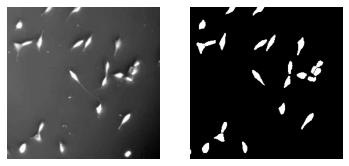

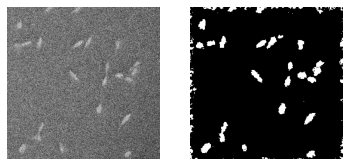

STANDARD DEVIATION                           : 55.0
Accuracy                                     : 0.9409377752565871
Jaccard score                                : 0.4142516073968373
Precision                                    : 0.5459475953997311
Recall                                       : 0.645209370082208
Number of cells in predictions               : 82203
Number of cells in masks                     : 16106


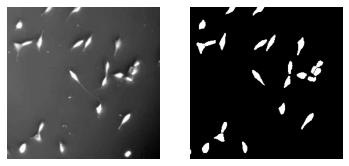

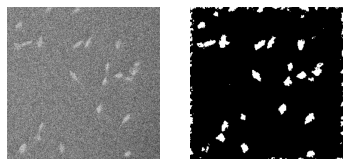

STANDARD DEVIATION                           : 60.0
Accuracy                                     : 0.9364864872951134
Jaccard score                                : 0.38082011687272815
Precision                                    : 0.5177514994683792
Recall                                       : 0.6066739360088722
Number of cells in predictions               : 88246
Number of cells in masks                     : 16106


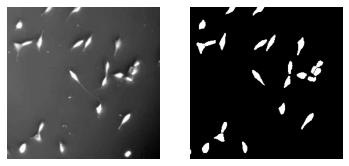

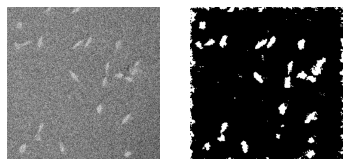

STANDARD DEVIATION                           : 65.0
Accuracy                                     : 0.9329651178098193
Jaccard score                                : 0.35424459552938264
Precision                                    : 0.4954036119310179
Recall                                       : 0.5712341285834022
Number of cells in predictions               : 93593
Number of cells in masks                     : 16106


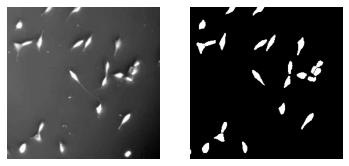

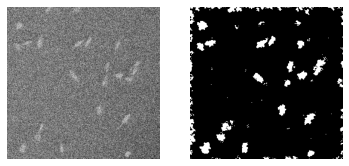

STANDARD DEVIATION                           : 70.0
Accuracy                                     : 0.9289001764035693
Jaccard score                                : 0.32933290999701503
Precision                                    : 0.46943122386251124
Recall                                       : 0.5420558528094014
Number of cells in predictions               : 101860
Number of cells in masks                     : 16106


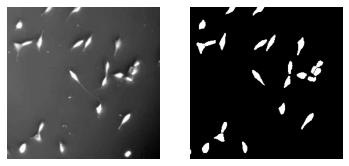

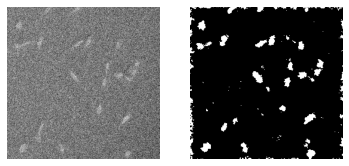

STANDARD DEVIATION                           : 75.0
Accuracy                                     : 0.9257490569469975
Jaccard score                                : 0.3046104198533733
Precision                                    : 0.4481077187010388
Recall                                       : 0.5061502635534596
Number of cells in predictions               : 106719
Number of cells in masks                     : 16106


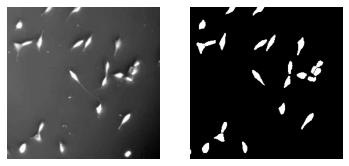

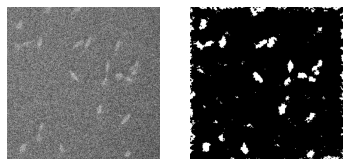

STANDARD DEVIATION                           : 80.0
Accuracy                                     : 0.9228837854721967
Jaccard score                                : 0.28142654315411064
Precision                                    : 0.4264159310292102
Recall                                       : 0.4710795576461508
Number of cells in predictions               : 110220
Number of cells in masks                     : 16106


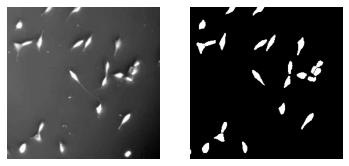

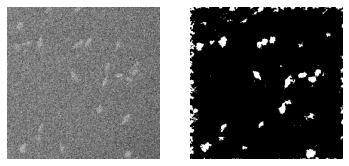

STANDARD DEVIATION                           : 85.0
Accuracy                                     : 0.9203169579599418
Jaccard score                                : 0.26150883148453424
Precision                                    : 0.4070798435200216
Recall                                       : 0.4400981688100736
Number of cells in predictions               : 112802
Number of cells in masks                     : 16106


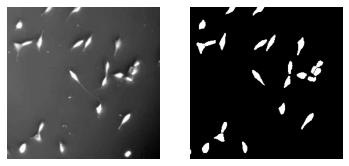

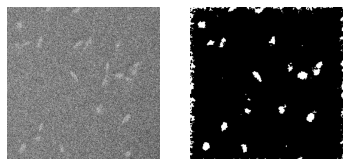

STANDARD DEVIATION                           : 90.0
Accuracy                                     : 0.917482204063266
Jaccard score                                : 0.2433372744249716
Precision                                    : 0.3858155568371651
Recall                                       : 0.4133965204107938
Number of cells in predictions               : 119601
Number of cells in masks                     : 16106


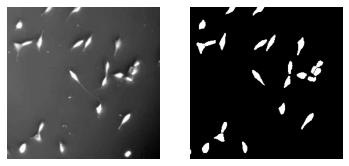

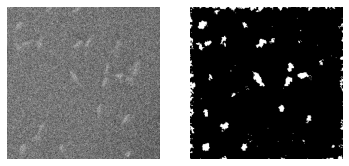

STANDARD DEVIATION                           : 95.0
Accuracy                                     : 0.9152702181946998
Jaccard score                                : 0.22543320457403856
Precision                                    : 0.3678769577943295
Recall                                       : 0.3847021240160737
Number of cells in predictions               : 122625
Number of cells in masks                     : 16106


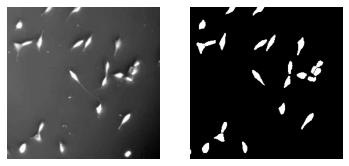

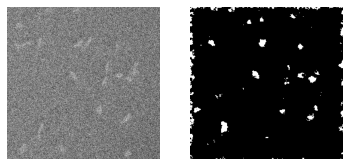

STANDARD DEVIATION                           : 100.0
Accuracy                                     : 0.9133614035213695
Jaccard score                                : 0.2109260744561298
Precision                                    : 0.35145046817922293
Recall                                       : 0.36095207736657814
Number of cells in predictions               : 124742
Number of cells in masks                     : 16106


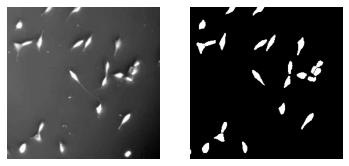

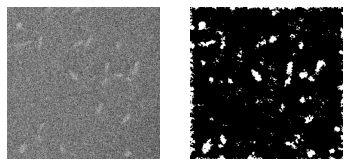

STANDARD DEVIATION                           : 105.0
Accuracy                                     : 0.9109778011546416
Jaccard score                                : 0.19426140526020644
Precision                                    : 0.33045142995975224
Recall                                       : 0.3346448364770842
Number of cells in predictions               : 128506
Number of cells in masks                     : 16106


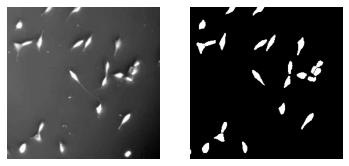

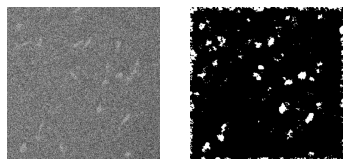

STANDARD DEVIATION                           : 110.0
Accuracy                                     : 0.9099327536190257
Jaccard score                                : 0.18274665237937274
Precision                                    : 0.3182572573570536
Recall                                       : 0.3163327599572632
Number of cells in predictions               : 128161
Number of cells in masks                     : 16106


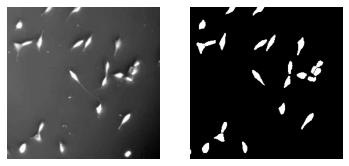

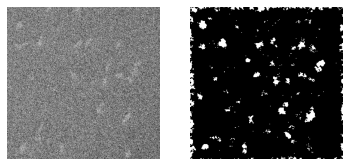

STANDARD DEVIATION                           : 115.0
Accuracy                                     : 0.9081655764112285
Jaccard score                                : 0.16987386085962364
Precision                                    : 0.3013098320787549
Recall                                       : 0.29359229237148804
Number of cells in predictions               : 129926
Number of cells in masks                     : 16106


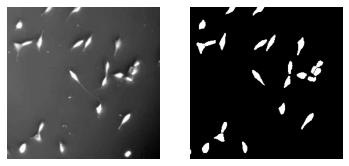

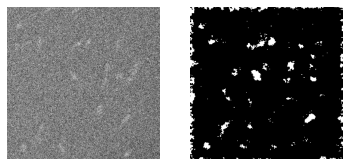

STANDARD DEVIATION                           : 120.0
Accuracy                                     : 0.9065492816999847
Jaccard score                                : 0.1607592540224318
Precision                                    : 0.2886572886333089
Recall                                       : 0.2801782327802458
Number of cells in predictions               : 134352
Number of cells in masks                     : 16106


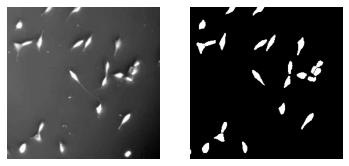

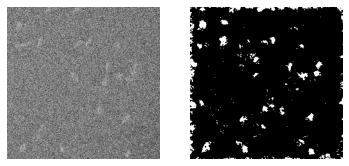

STANDARD DEVIATION                           : 125.0
Accuracy                                     : 0.9059533212699142
Jaccard score                                : 0.15103987373753242
Precision                                    : 0.27685076255177465
Recall                                       : 0.2612404377336847
Number of cells in predictions               : 132304
Number of cells in masks                     : 16106


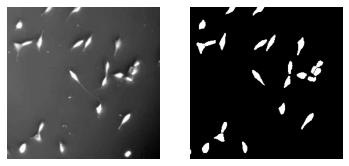

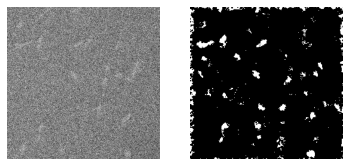

STANDARD DEVIATION                           : 130.0
Accuracy                                     : 0.9041446760589001
Jaccard score                                : 0.14259572791830344
Precision                                    : 0.26459196867620033
Recall                                       : 0.24956706566031298
Number of cells in predictions               : 137452
Number of cells in masks                     : 16106


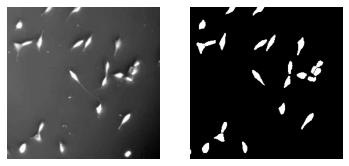

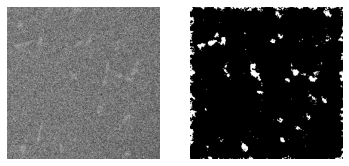

STANDARD DEVIATION                           : 135.0
Accuracy                                     : 0.9033655802408854
Jaccard score                                : 0.13458448378560728
Precision                                    : 0.2528523827045357
Recall                                       : 0.23449264493233038
Number of cells in predictions               : 136813
Number of cells in masks                     : 16106


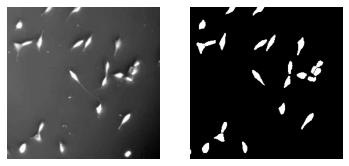

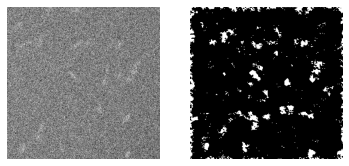

STANDARD DEVIATION                           : 140.0
Accuracy                                     : 0.9025078866996017
Jaccard score                                : 0.12831084100983178
Precision                                    : 0.24269319081196752
Recall                                       : 0.2244725142351142
Number of cells in predictions               : 139000
Number of cells in masks                     : 16106


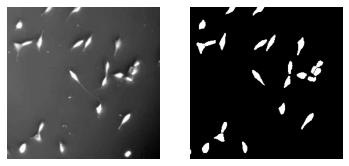

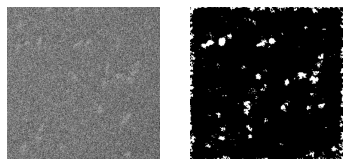

STANDARD DEVIATION                           : 145.0
Accuracy                                     : 0.901860824285769
Jaccard score                                : 0.11958844568736811
Precision                                    : 0.23202272904863747
Recall                                       : 0.20859548677565534
Number of cells in predictions               : 137707
Number of cells in masks                     : 16106


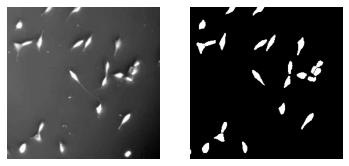

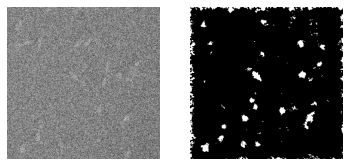

STANDARD DEVIATION                           : 150.0
Accuracy                                     : 0.9001917820350797
Jaccard score                                : 0.11290512610033085
Precision                                    : 0.2201974721105993
Recall                                       : 0.19867369287717646
Number of cells in predictions               : 141780
Number of cells in masks                     : 16106


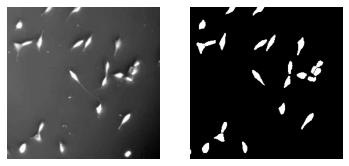

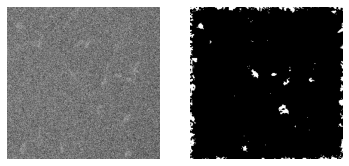

STANDARD DEVIATION                           : 155.0
Accuracy                                     : 0.9000916125727635
Jaccard score                                : 0.10904331159015189
Precision                                    : 0.214484010012501
Recall                                       : 0.19154004196027205
Number of cells in predictions               : 141576
Number of cells in masks                     : 16106


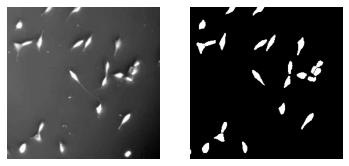

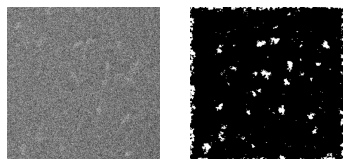

STANDARD DEVIATION                           : 160.0
Accuracy                                     : 0.899645367790671
Jaccard score                                : 0.10440864797923353
Precision                                    : 0.20755431584293227
Recall                                       : 0.18355916697317434
Number of cells in predictions               : 140214
Number of cells in masks                     : 16106


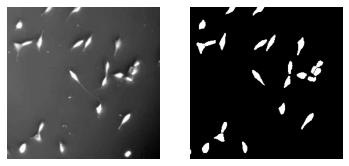

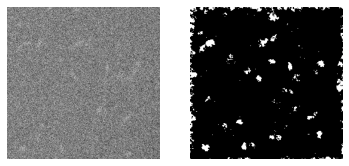

STANDARD DEVIATION                           : 165.0
Accuracy                                     : 0.8992401123046875
Jaccard score                                : 0.09969947561810205
Precision                                    : 0.20020056984349324
Recall                                       : 0.17466167471064875
Number of cells in predictions               : 138785
Number of cells in masks                     : 16106


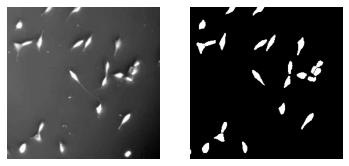

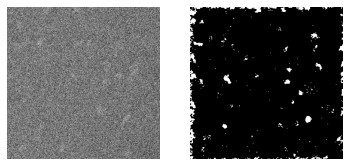

STANDARD DEVIATION                           : 170.0
Accuracy                                     : 0.898023089240579
Jaccard score                                : 0.09506218368865449
Precision                                    : 0.1911277156039459
Recall                                       : 0.16774950819744475
Number of cells in predictions               : 143291
Number of cells in masks                     : 16106


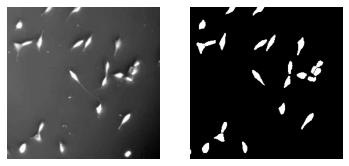

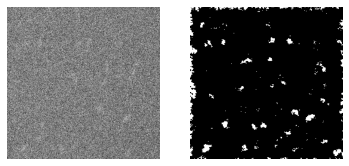

STANDARD DEVIATION                           : 175.0
Accuracy                                     : 0.8978011486577052
Jaccard score                                : 0.09307929060924158
Precision                                    : 0.1883398318094898
Recall                                       : 0.16439504417300788
Number of cells in predictions               : 142129
Number of cells in masks                     : 16106


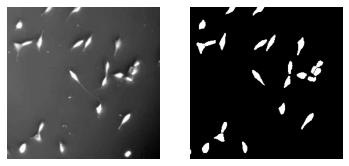

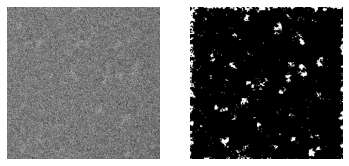

STANDARD DEVIATION                           : 180.0
Accuracy                                     : 0.8969086590935202
Jaccard score                                : 0.08946950058710573
Precision                                    : 0.18126327009881246
Recall                                       : 0.15879019540254818
Number of cells in predictions               : 146101
Number of cells in masks                     : 16106


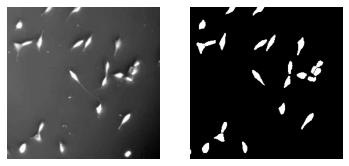

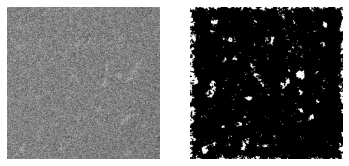

STANDARD DEVIATION                           : 185.0
Accuracy                                     : 0.8966380100624234
Jaccard score                                : 0.08541659933353495
Precision                                    : 0.17513906560615788
Recall                                       : 0.15104716708901317
Number of cells in predictions               : 143989
Number of cells in masks                     : 16106


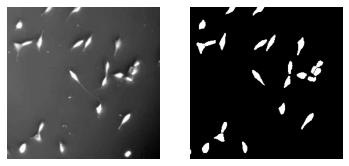

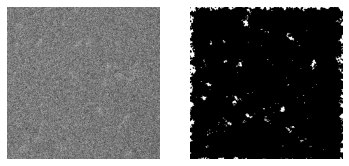

STANDARD DEVIATION                           : 190.0
Accuracy                                     : 0.8960395962584252
Jaccard score                                : 0.08185050055049439
Precision                                    : 0.16886920818501844
Recall                                       : 0.14572340737198897
Number of cells in predictions               : 143851
Number of cells in masks                     : 16106


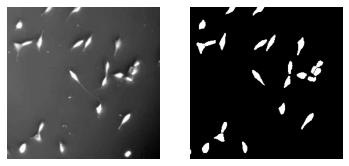

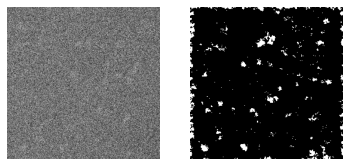

STANDARD DEVIATION                           : 195.0
Accuracy                                     : 0.8959379906747855
Jaccard score                                : 0.08121890494177873
Precision                                    : 0.167330352385939
Recall                                       : 0.14353664554279097
Number of cells in predictions               : 144997
Number of cells in masks                     : 16106


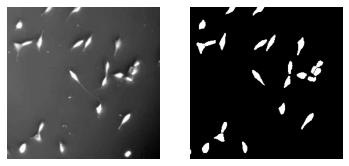

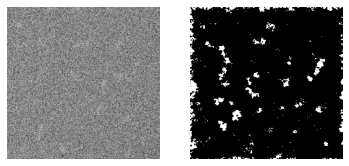

STANDARD DEVIATION                           : 200.0
Accuracy                                     : 0.8965901991900276
Jaccard score                                : 0.07771463356318242
Precision                                    : 0.16311551097087693
Recall                                       : 0.13580685266928358
Number of cells in predictions               : 141631
Number of cells in masks                     : 16106


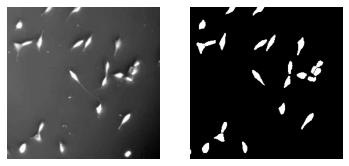

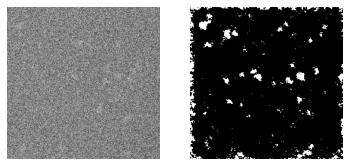

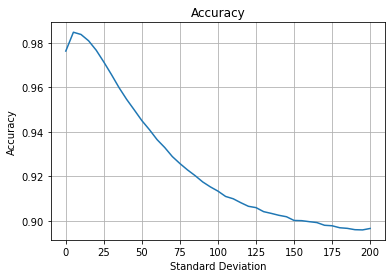

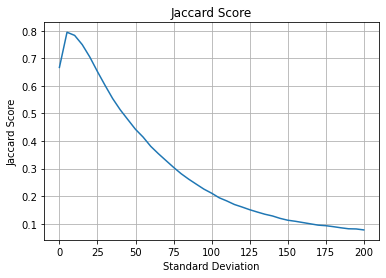

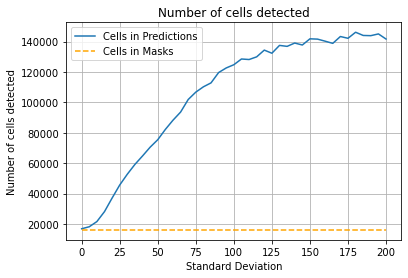

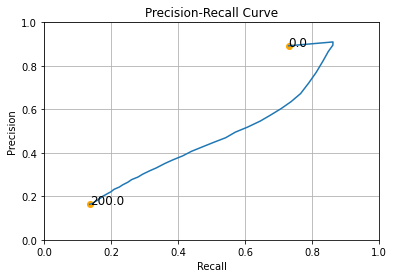

In [8]:
parameter_name = "Standard Deviation"
mean = 0
sigmas = np.linspace(0, 200, 41)
results = {}
for sigma in sigmas:
    noisy_test_images = apply_distortion_to_all(add_gaussian_noise, test_images, {"mean": mean, "sigma": sigma})

    result = evaluate_model(noisy_test_images, test_masks, model, number_cells_masks)
    results[sigma] = result
    
    evaluation_summary(result, parameter_name, sigma, test_images[0], test_masks[0], noisy_test_images[0], model)
        
plot_results(results, parameter_name)

### $\bullet$ Analysis of the perturbations caused by a rescaling of the images on the UNET performance

ZOOMING FACTOR FROM PATCHES                  : 0.5
Accuracy                                     : 0.9851338704427083
Jaccard score                                : 0.30971254431739614
Precision                                    : 0.5443161096218392
Recall                                       : 0.4179668620934458
Number of cells in predictions               : 8483
Number of cells in masks                     : 14641


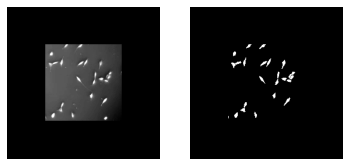

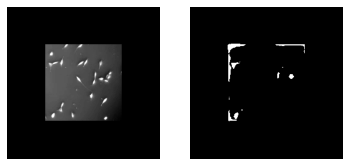

ZOOMING FACTOR FROM PATCHES                  : 0.6
Accuracy                                     : 0.9837522319718903
Jaccard score                                : 0.5095316652870318
Precision                                    : 0.6476724781455081
Recall                                       : 0.7052153881936978
Number of cells in predictions               : 11907
Number of cells in masks                     : 15089


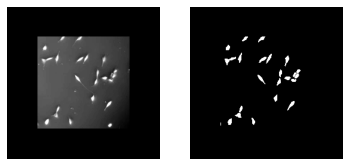

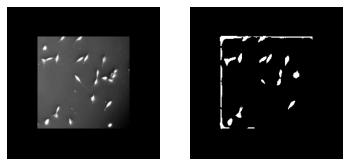

ZOOMING FACTOR FROM PATCHES                  : 0.7
Accuracy                                     : 0.9856442021388634
Jaccard score                                : 0.66635304844699
Precision                                    : 0.7357094882565457
Recall                                       : 0.8769867390923716
Number of cells in predictions               : 13562
Number of cells in masks                     : 15483


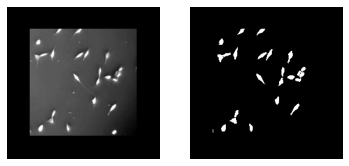

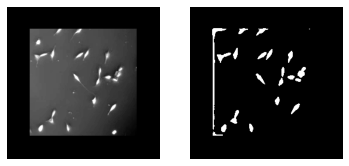

ZOOMING FACTOR FROM PATCHES                  : 0.8
Accuracy                                     : 0.9846533382640166
Jaccard score                                : 0.7184817755426198
Precision                                    : 0.7607003892885745
Recall                                       : 0.9288374611980924
Number of cells in predictions               : 14802
Number of cells in masks                     : 15649


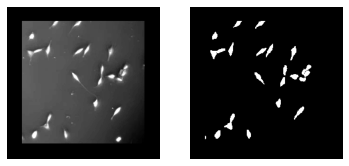

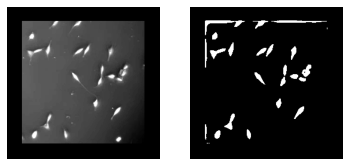

ZOOMING FACTOR FROM PATCHES                  : 0.9
Accuracy                                     : 0.9844251146503523
Jaccard score                                : 0.764218753027708
Precision                                    : 0.8067201923450231
Recall                                       : 0.9363075021443806
Number of cells in predictions               : 16007
Number of cells in masks                     : 16029


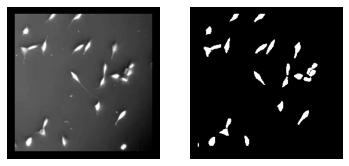

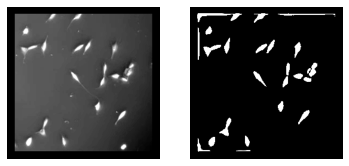

ZOOMING FACTOR FROM PATCHES                  : 1.0
Accuracy                                     : 0.9907619999904259
Jaccard score                                : 0.8764081826985913
Precision                                    : 0.9197112580383474
Recall                                       : 0.9492080237521013
Number of cells in predictions               : 16612
Number of cells in masks                     : 16106


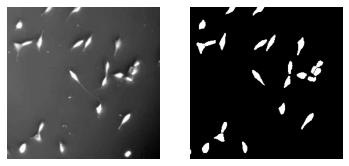

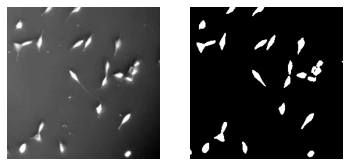

ZOOMING FACTOR FROM PATCHES                  : 1.1
Accuracy                                     : 0.9886246924306832
Jaccard score                                : 0.8446981766178362
Precision                                    : 0.9222940628732267
Recall                                       : 0.9097345221662669
Number of cells in predictions               : 14371
Number of cells in masks                     : 13709


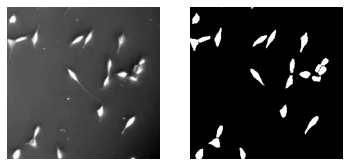

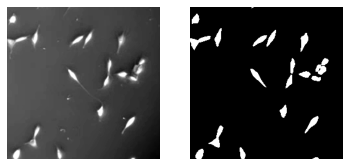

ZOOMING FACTOR FROM PATCHES                  : 1.2000000000000002
Accuracy                                     : 0.9879378674077053
Jaccard score                                : 0.8299244406287274
Precision                                    : 0.9377486651017786
Recall                                       : 0.878850577348077
Number of cells in predictions               : 12587
Number of cells in masks                     : 11600


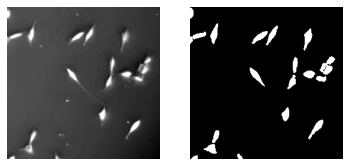

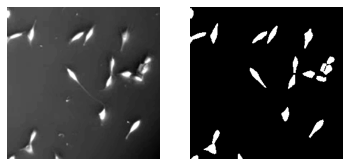

ZOOMING FACTOR FROM PATCHES                  : 1.3
Accuracy                                     : 0.9860254325118719
Jaccard score                                : 0.7969711965911319
Precision                                    : 0.9433659305681058
Recall                                       : 0.8378383171107593
Number of cells in predictions               : 11073
Number of cells in masks                     : 10054


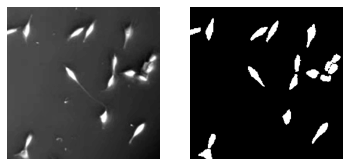

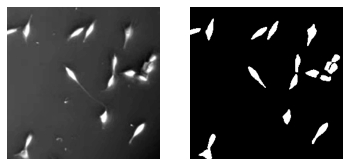

ZOOMING FACTOR FROM PATCHES                  : 1.4
Accuracy                                     : 0.9836775536630668
Jaccard score                                : 0.756115145407313
Precision                                    : 0.9471351062121839
Recall                                       : 0.7906735258935051
Number of cells in predictions               : 9913
Number of cells in masks                     : 8825


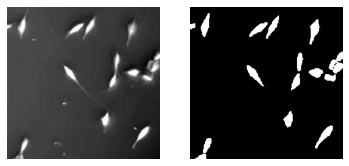

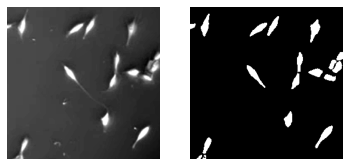

ZOOMING FACTOR FROM PATCHES                  : 1.5
Accuracy                                     : 0.9815748027726716
Jaccard score                                : 0.7212262454487448
Precision                                    : 0.9446986182536258
Recall                                       : 0.7545144854954206
Number of cells in predictions               : 9045
Number of cells in masks                     : 8302


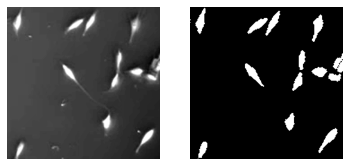

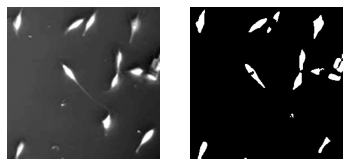

ZOOMING FACTOR FROM PATCHES                  : 1.6
Accuracy                                     : 0.9792908612419577
Jaccard score                                : 0.6870751925780805
Precision                                    : 0.9477890486824035
Recall                                       : 0.7152749171115762
Number of cells in predictions               : 8393
Number of cells in masks                     : 7031


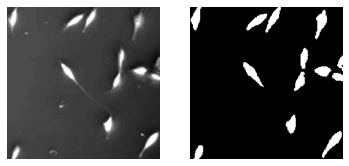

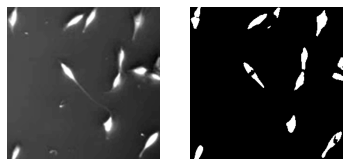

ZOOMING FACTOR FROM PATCHES                  : 1.7000000000000002
Accuracy                                     : 0.9775099511240043
Jaccard score                                : 0.6595956834218508
Precision                                    : 0.9459393667154
Recall                                       : 0.6862266569912725
Number of cells in predictions               : 7814
Number of cells in masks                     : 6379


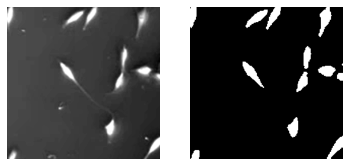

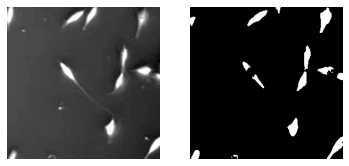

ZOOMING FACTOR FROM PATCHES                  : 1.8
Accuracy                                     : 0.9759536743164062
Jaccard score                                : 0.6373344311945138
Precision                                    : 0.9452826244462247
Recall                                       : 0.6625604578772426
Number of cells in predictions               : 7283
Number of cells in masks                     : 5843


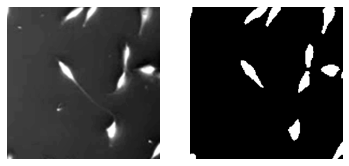

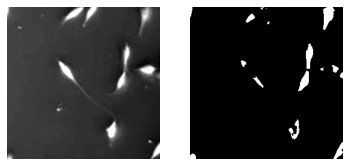

ZOOMING FACTOR FROM PATCHES                  : 1.9000000000000001
Accuracy                                     : 0.9751180013020834
Jaccard score                                : 0.624678402634758
Precision                                    : 0.9414616826519566
Recall                                       : 0.6505458225911415
Number of cells in predictions               : 6719
Number of cells in masks                     : 5522


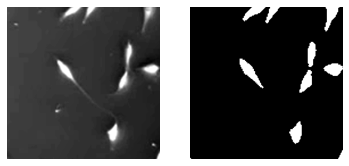

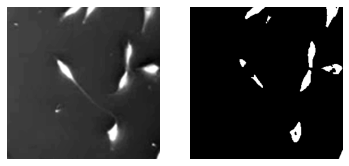

ZOOMING FACTOR FROM PATCHES                  : 2.0
Accuracy                                     : 0.974238556506587
Jaccard score                                : 0.6129477018947465
Precision                                    : 0.9393446155290721
Recall                                       : 0.6390147662105202
Number of cells in predictions               : 6348
Number of cells in masks                     : 4774


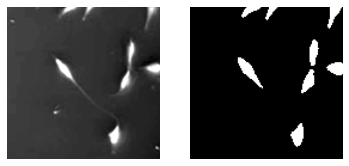

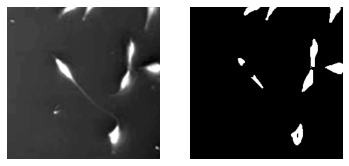

ZOOMING FACTOR FROM PATCHES                  : 2.5
Accuracy                                     : 0.9715230605181526
Jaccard score                                : 0.5576631844057892
Precision                                    : 0.9048412020870278
Recall                                       : 0.5844539914081393
Number of cells in predictions               : 4702
Number of cells in masks                     : 3788


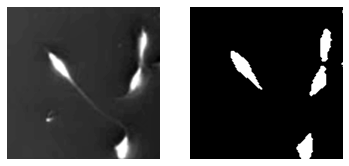

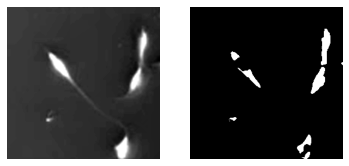

ZOOMING FACTOR FROM PATCHES                  : 3.0
Accuracy                                     : 0.9671355901979932
Jaccard score                                : 0.47271593695781405
Precision                                    : 0.8620160288670471
Recall                                       : 0.49772501343955616
Number of cells in predictions               : 3681
Number of cells in masks                     : 2667


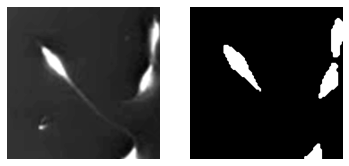

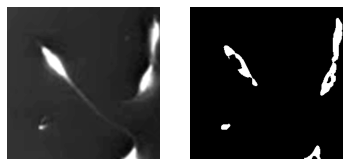

ZOOMING FACTOR FROM PATCHES                  : 3.5
Accuracy                                     : 0.9613604377297794
Jaccard score                                : 0.3656965742983785
Precision                                    : 0.780812768091385
Recall                                       : 0.38306112746426524
Number of cells in predictions               : 3074
Number of cells in masks                     : 2197


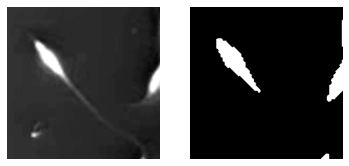

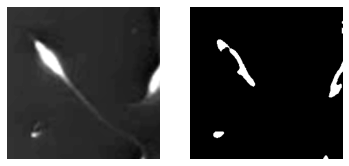

ZOOMING FACTOR FROM PATCHES                  : 4.0
Accuracy                                     : 0.9557370653339461
Jaccard score                                : 0.28329324494385805
Precision                                    : 0.7235768166745206
Recall                                       : 0.2952468886030056
Number of cells in predictions               : 2718
Number of cells in masks                     : 1845


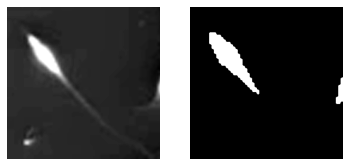

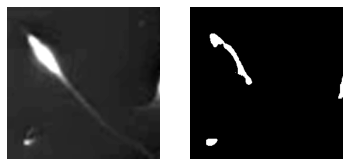

ZOOMING FACTOR FROM PATCHES                  : 4.5
Accuracy                                     : 0.9510227278167126
Jaccard score                                : 0.21576606716477467
Precision                                    : 0.6693295444587262
Recall                                       : 0.22410334633116705
Number of cells in predictions               : 2455
Number of cells in masks                     : 1658


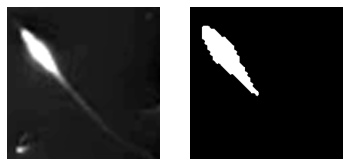

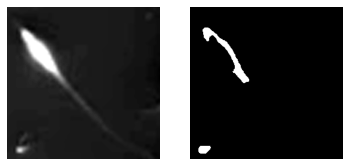

ZOOMING FACTOR FROM PATCHES                  : 5.0
Accuracy                                     : 0.9473339006012561
Jaccard score                                : 0.1673892482733088
Precision                                    : 0.6314855379245617
Recall                                       : 0.1727594131823039
Number of cells in predictions               : 2216
Number of cells in masks                     : 1471


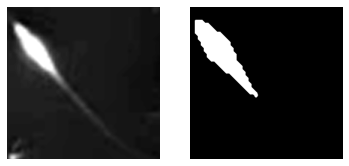

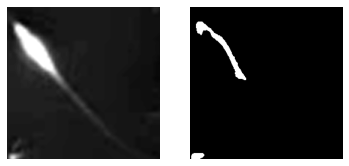

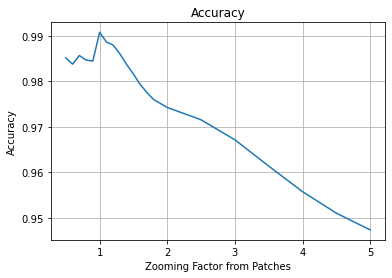

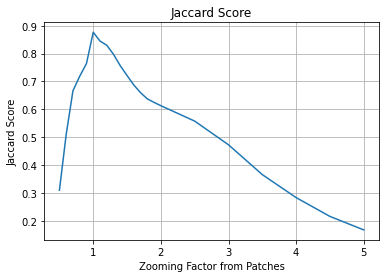

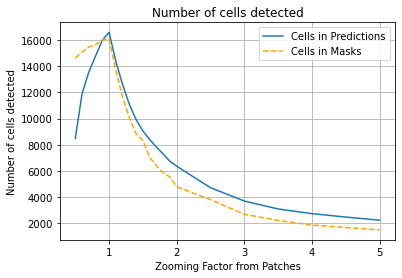

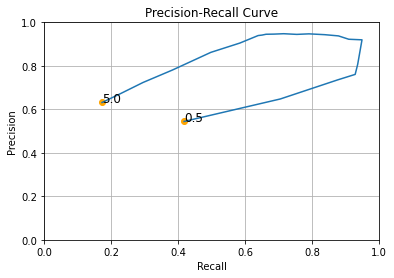

In [9]:
parameter_name = "Zooming Factor from Patches"
zooms = np.r_[np.linspace(0.5, 2, 15, endpoint=False), np.linspace(2, 5, 7)]
results = {}
for zoom in zooms:
    zoomed_test_images = apply_distortion_to_all(zoom_image, test_images, {"zoom_factor": zoom})
    zoomed_test_masks  = apply_distortion_to_all(zoom_image, test_masks , {"zoom_factor": zoom, "val_padding": 0})

    result = evaluate_model(zoomed_test_images, zoomed_test_masks, model)
    results[zoom] = result
    
    evaluation_summary(result, parameter_name, zoom, zoomed_test_images[0], zoomed_test_masks[0], zoomed_test_images[0], model)
    
plot_results(results, parameter_name)

### $\bullet$ Get full input images from dataset

In [10]:
test_full_images, test_full_masks = get_dataset_from_folders(test_input_path, test_output_path)
full_images_shape = (*test_full_images[0].shape, 1)

print(f'Test set contains {len(test_full_images)} images of shape {full_images_shape}.')

Test set contains 85 images of shape (576, 720, 1).


### $\bullet$ Analysis of the perturbations caused by havind different sizes of cells on the UNET performance

ZOOMING FACTOR FROM ORIGINAL IMAGES          : 0.5
Accuracy                                     : 0.9494688744638481
Jaccard score                                : 0.3523547299816873
Precision                                    : 0.7321722387527685
Recall                                       : 0.4058454643422709
Number of cells in predictions               : 33481
Number of cells in masks                     : 55863


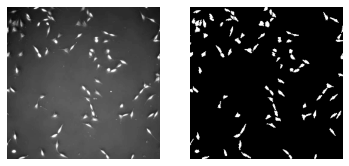

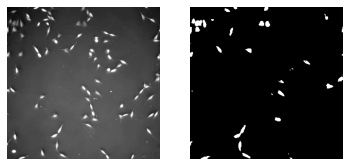

ZOOMING FACTOR FROM ORIGINAL IMAGES          : 0.6
Accuracy                                     : 0.966653621897978
Jaccard score                                : 0.5976863915562314
Precision                                    : 0.8020300689293709
Recall                                       : 0.7016301413249921
Number of cells in predictions               : 32760
Number of cells in masks                     : 40731


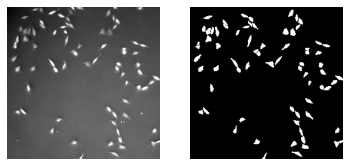

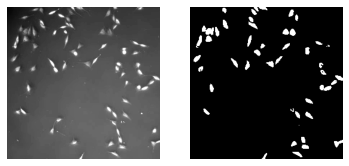

ZOOMING FACTOR FROM ORIGINAL IMAGES          : 0.7
Accuracy                                     : 0.979670924766391
Jaccard score                                : 0.753755408940984
Precision                                    : 0.8328188591061019
Recall                                       : 0.88856576638381
Number of cells in predictions               : 28343
Number of cells in masks                     : 30943


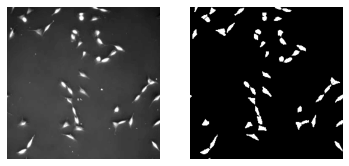

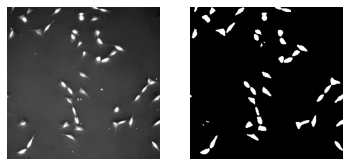

ZOOMING FACTOR FROM ORIGINAL IMAGES          : 0.8
Accuracy                                     : 0.985588103649663
Jaccard score                                : 0.8175927281295194
Precision                                    : 0.8628559119735787
Recall                                       : 0.9400715667152961
Number of cells in predictions               : 23330
Number of cells in masks                     : 24129


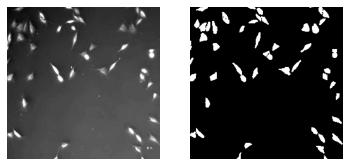

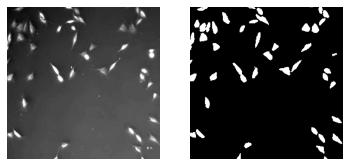

ZOOMING FACTOR FROM ORIGINAL IMAGES          : 0.9
Accuracy                                     : 0.9877063826018688
Jaccard score                                : 0.840680563405626
Precision                                    : 0.8846687790356178
Recall                                       : 0.9443684983442739
Number of cells in predictions               : 19530
Number of cells in masks                     : 19611


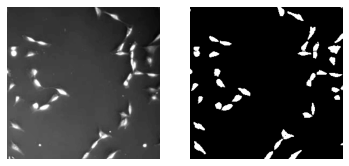

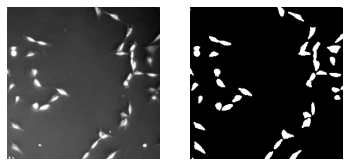

ZOOMING FACTOR FROM ORIGINAL IMAGES          : 1.0
Accuracy                                     : 0.9907513786764706
Jaccard score                                : 0.8769507573230165
Precision                                    : 0.9214094348813682
Recall                                       : 0.9481661187184904
Number of cells in predictions               : 16763
Number of cells in masks                     : 16144


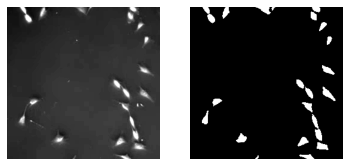

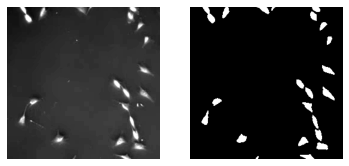

ZOOMING FACTOR FROM ORIGINAL IMAGES          : 1.1
Accuracy                                     : 0.9877635282628676
Jaccard score                                : 0.8401205772744393
Precision                                    : 0.9195423001461859
Recall                                       : 0.9070916680892038
Number of cells in predictions               : 17167
Number of cells in masks                     : 16075


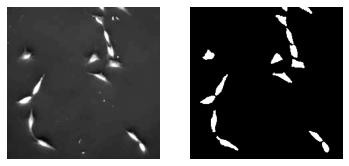

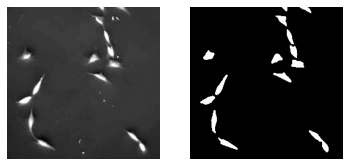

ZOOMING FACTOR FROM ORIGINAL IMAGES          : 1.2000000000000002
Accuracy                                     : 0.9869510027318219
Jaccard score                                : 0.8217377455473129
Precision                                    : 0.9263767645968127
Recall                                       : 0.8796642267719793
Number of cells in predictions               : 19174
Number of cells in masks                     : 17407


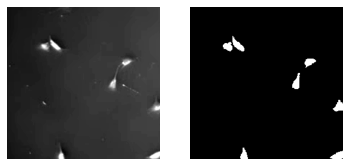

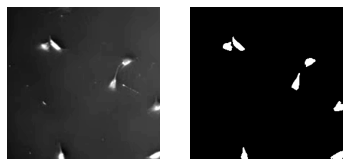

ZOOMING FACTOR FROM ORIGINAL IMAGES          : 1.3
Accuracy                                     : 0.9844370404411765
Jaccard score                                : 0.784647397249638
Precision                                    : 0.931969047269784
Recall                                       : 0.8333205095587803
Number of cells in predictions               : 19252
Number of cells in masks                     : 16954


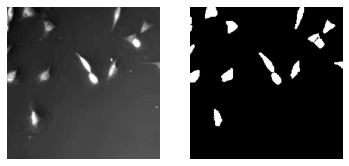

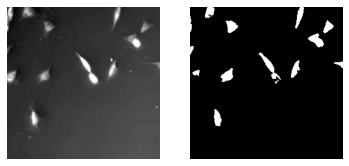

ZOOMING FACTOR FROM ORIGINAL IMAGES          : 1.4
Accuracy                                     : 0.9819032407274433
Jaccard score                                : 0.749242266755849
Precision                                    : 0.9329548948970887
Recall                                       : 0.7929715338355604
Number of cells in predictions               : 21116
Number of cells in masks                     : 17934


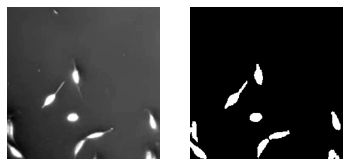

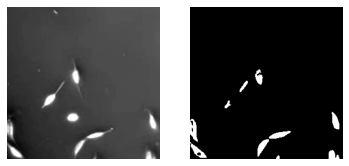

ZOOMING FACTOR FROM ORIGINAL IMAGES          : 1.5
Accuracy                                     : 0.9787335307658219
Jaccard score                                : 0.706320819627133
Precision                                    : 0.9359832583883367
Recall                                       : 0.7429761632934488
Number of cells in predictions               : 23032
Number of cells in masks                     : 19239


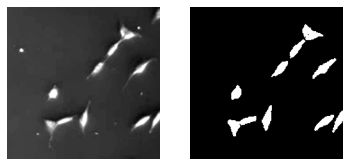

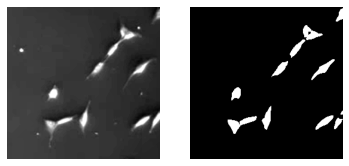

ZOOMING FACTOR FROM ORIGINAL IMAGES          : 1.6
Accuracy                                     : 0.976854907765108
Jaccard score                                : 0.6776016785773497
Precision                                    : 0.92964557127424
Recall                                       : 0.7155710108453222
Number of cells in predictions               : 24382
Number of cells in masks                     : 19785


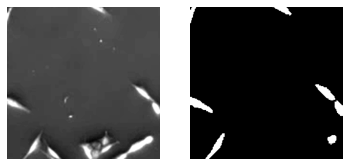

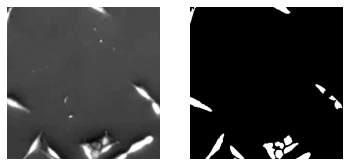

ZOOMING FACTOR FROM ORIGINAL IMAGES          : 1.7000000000000002
Accuracy                                     : 0.97438275704976
Jaccard score                                : 0.6443427080691545
Precision                                    : 0.9327247499523271
Recall                                       : 0.6769683899386442
Number of cells in predictions               : 25598
Number of cells in masks                     : 20165


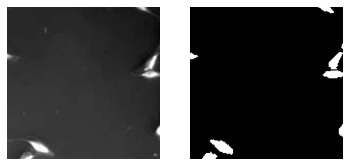

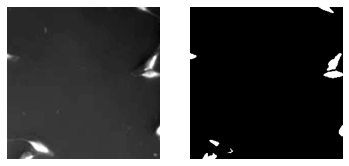

ZOOMING FACTOR FROM ORIGINAL IMAGES          : 1.8
Accuracy                                     : 0.9731051545984605
Jaccard score                                : 0.6262220806845902
Precision                                    : 0.9284347177697098
Recall                                       : 0.6588716985977995
Number of cells in predictions               : 26492
Number of cells in masks                     : 20472


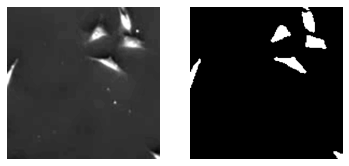

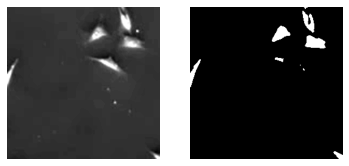

ZOOMING FACTOR FROM ORIGINAL IMAGES          : 1.9000000000000001
Accuracy                                     : 0.9717228023597346
Jaccard score                                : 0.6083654210903255
Precision                                    : 0.9257175721797073
Recall                                       : 0.641371322703767
Number of cells in predictions               : 28350
Number of cells in masks                     : 21411


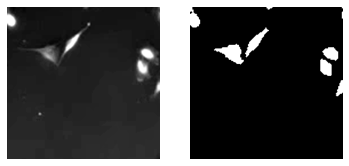

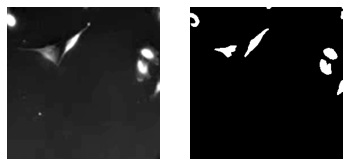

ZOOMING FACTOR FROM ORIGINAL IMAGES          : 2.0
Accuracy                                     : 0.9702149801815257
Jaccard score                                : 0.5974210128070703
Precision                                    : 0.9203108407660263
Recall                                       : 0.631579757773999
Number of cells in predictions               : 29806
Number of cells in masks                     : 21418


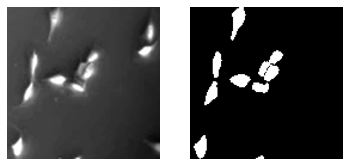

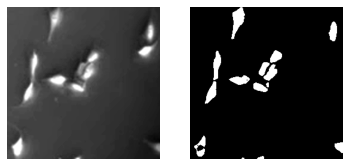

ZOOMING FACTOR FROM ORIGINAL IMAGES          : 2.5
Accuracy                                     : 0.966540867962269
Jaccard score                                : 0.5475733431985262
Precision                                    : 0.8917713825172272
Recall                                       : 0.5830529366104338
Number of cells in predictions               : 33701
Number of cells in masks                     : 24586


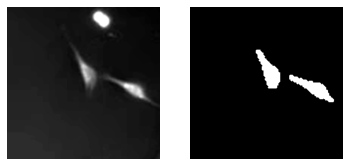

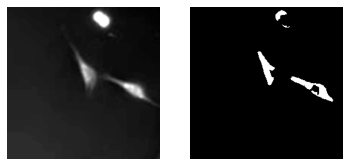

ZOOMING FACTOR FROM ORIGINAL IMAGES          : 3.0
Accuracy                                     : 0.960837469110794
Jaccard score                                : 0.4630770511993277
Precision                                    : 0.8588415511429495
Recall                                       : 0.4927160205702012
Number of cells in predictions               : 38480
Number of cells in masks                     : 27969


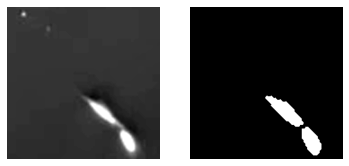

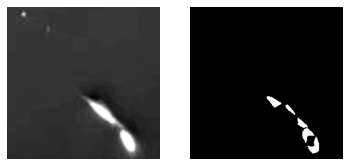

ZOOMING FACTOR FROM ORIGINAL IMAGES          : 3.5
Accuracy                                     : 0.9556623909107322
Jaccard score                                : 0.36541202353938196
Precision                                    : 0.7971231913782668
Recall                                       : 0.3884202244530197
Number of cells in predictions               : 43052
Number of cells in masks                     : 30364


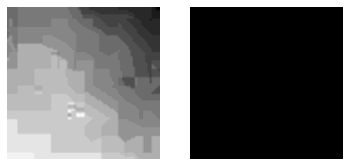

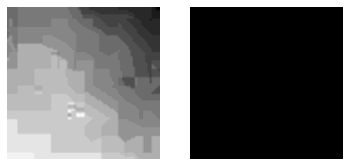

ZOOMING FACTOR FROM ORIGINAL IMAGES          : 4.0
Accuracy                                     : 0.949508767969468
Jaccard score                                : 0.2869888810129757
Precision                                    : 0.7430221254452288
Recall                                       : 0.30309416994196375
Number of cells in predictions               : 39126
Number of cells in masks                     : 27099


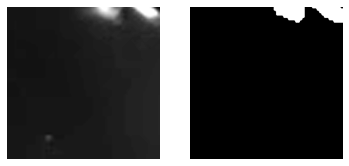

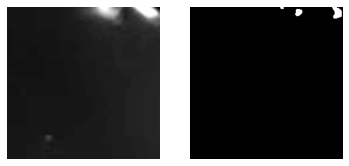

ZOOMING FACTOR FROM ORIGINAL IMAGES          : 4.5
Accuracy                                     : 0.944530341204475
Jaccard score                                : 0.20829932229192824
Precision                                    : 0.6744270226822191
Recall                                       : 0.21885171547994017
Number of cells in predictions               : 33373
Number of cells in masks                     : 23200


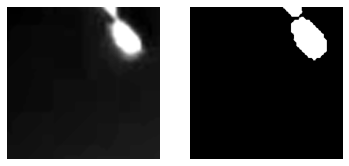

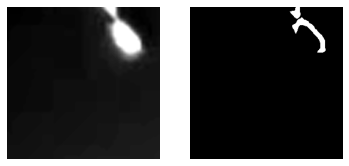

ZOOMING FACTOR FROM ORIGINAL IMAGES          : 5.0
Accuracy                                     : 0.9419743414486156
Jaccard score                                : 0.16451105546768982
Precision                                    : 0.6305861359320389
Recall                                       : 0.1715720757462025
Number of cells in predictions               : 29654
Number of cells in masks                     : 20815


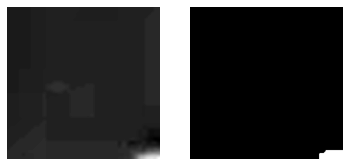

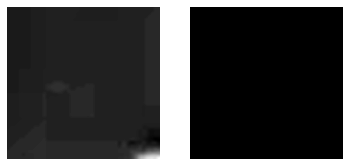

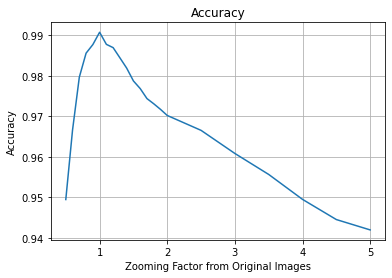

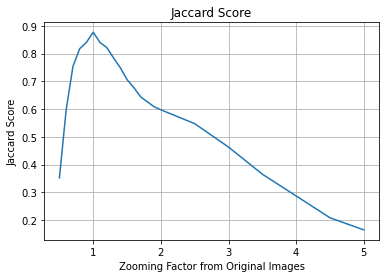

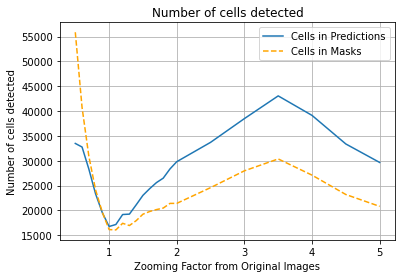

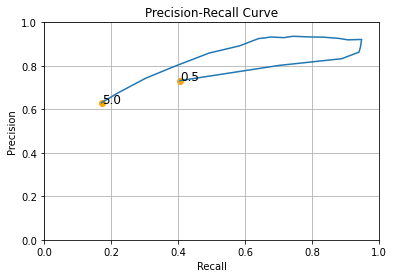

In [11]:
parameter_name = "Zooming Factor from Original Images"
zooms = np.r_[np.linspace(0.5, 2, 15, endpoint=False), np.linspace(2, 5, 7)]
results = {}
for zoom in zooms:
    patch_shape = (int(images_shape[0] / zoom), int(images_shape[1] / zoom), 1)
    n_patches = np.clip(np.prod(np.divide(full_images_shape, patch_shape)), 6, 80).astype('uint')
    patch_images, patch_masks = split_images_and_masks_into_patches(test_full_images, test_full_masks, patch_shape, n_patches)
    
    zoomed_test_images = apply_distortion_to_all(zoom_image_to_meet_shape, patch_images, {"shape": images_shape})
    zoomed_test_masks  = apply_distortion_to_all(zoom_image_to_meet_shape, patch_masks , {"shape": images_shape})

    result = evaluate_model(zoomed_test_images, zoomed_test_masks, model)
    results[zoom] = result
    
    evaluation_summary(result, parameter_name, zoom, zoomed_test_images[0], zoomed_test_masks[0], zoomed_test_images[0], model)
    
plot_results(results, parameter_name)